# APPLICATION AND DEPLOYMENT OF ADVANCED DATA ANALYTICS

# GROUP 3 - FINAL NARRATIVE REPORT

# PROJECT TITLE - AIRBNB LISTINGS - SEATTLE, WA

### Project Members

    S.NO            Name                  Student ID
     1       Gayatri Kannekanti            11716318 
     2       Haritha Chinthalacheruvu      11671543
     3       Jaswanth Donthineni           11705487
     4        Manoj Kumar Madiraju         11702330

# Question of Interest
### Predicting the price of Airbnb listings in Seattle city based on factors like property type, bedrooms, location, accomodates, and guests_included.

We have worked on `Airbnb listings dataset for Seattle city`. We wanted to focus our analysis more on factors that are significantly influencing the `price` of Airbnb listings in Seattle city.

### 1) Data Introduction and Data Description

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [2]:
# Loading the listings data
listings_file_path = 'listings.csv'
listings_df = pd.read_csv(listings_file_path)
listings_df.shape

(3818, 92)

Our dataset contained `3818 rows` and `92 columns` which included a wide range of information related to property details, host information, pricing, and reviews, etc as shown below.

In [3]:
# Basic information about our data
print("Listings Dataset Info:")
listings_df.info()

Listings Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-nul

In [4]:
# Display 1st 5 rows
print("\nFirst 5 rows of the listings dataset:")
listings_df.head()


First 5 rows of the listings dataset:


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


We tried to explore the first few rows of our dataset to understand its structure and complexity.

In [5]:
# Summary statistics
print("\nSummary statistics of numerical columns in listings dataset:")
listings_df.describe()


Summary statistics of numerical columns in listings dataset:


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


We reviewed summary statistics for different numerical columns. During this we found that price column of listings in Seattle is ranging from `20$ to 12,150$` which shows the wide variety of listings that are available in Seattle city.

### 2) Data Understading and EDA

In [6]:
from sklearn.model_selection import train_test_split

# Dropping the unnecessary columns
unnecessary_columns_to_remove = [
    'id', 'listing_url', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
    'host_url', 'host_thumbnail_url', 'host_picture_url', 'scrape_id', 'last_scraped',
    'calendar_last_scraped', 'description', 'experiences_offered',
    'neighborhood_overview', 'notes', 'host_id', 'host_listings_count', 'host_total_listings_count']
 
# Cleaning the DataFrame
listings_df_cleaned = listings_df.drop(columns=unnecessary_columns_to_remove, errors='ignore')
 
# Selecting only numeric columns for further analysis
numeric_columns = listings_df_cleaned.select_dtypes(include=['number'])
 
# Converting 'price' to numeric by removing currency symbols and commas
listings_df['price'] = listings_df['price'].astype(str).str.replace('[\$,]', '', regex=True).astype(float)

# Checking the first 5 rows to verify the conversion
print(listings_df['price'].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


In [7]:
# Checking for columns after cleaning
listings_df_cleaned.columns

Index(['name', 'summary', 'space', 'transit', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_verifications', 'host_has_profile_pic',
       'host_identity_verified', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city',
       'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'latitude', 'longitude', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'has_availability', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
  

We have cleaned the data by removing unnecessary columns like `URLs, host pictures, descriptive text etc.,` as they were unlikely to  contribute meaningfully to our predictions and since `Price` is our target variable, we have converted it from a string format to numerical format by removing the `dollar sign ($) and comma (,)`

In [8]:
from sklearn.model_selection import train_test_split

# Feature set (X) and target (y)
X = listings_df[['accommodates', 'bedrooms', 'beds', 'guests_included', 'square_feet']]
y = listings_df['price'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We have split our data into `training and testing sets` in `80-20 ratio` to perform our analysis.

In [10]:
# Handling missing values
# Checking for missing values in square_feet
print("Missing values in square_feet before imputation:", X['square_feet'].isna().sum())

# Imputing missing values with the column's mean
X['square_feet'] = X['square_feet'].fillna(X['square_feet'].mean())

# ensuring there are no missing values
print("Missing values in square_feet after imputation:", X['square_feet'].isna().sum())
selected_columns = ['accommodates', 'bedrooms', 'beds', 'square_feet','guests_included', 'price']
listings_df_cleaned =listings_df[selected_columns].dropna()
warnings.filterwarnings("ignore")

Missing values in square_feet before imputation: 0
Missing values in square_feet after imputation: 0


Columns like `square_feet` had significant number of null values. So, we have imputed those null values with that column’s mean and ensured no column contained missing values.

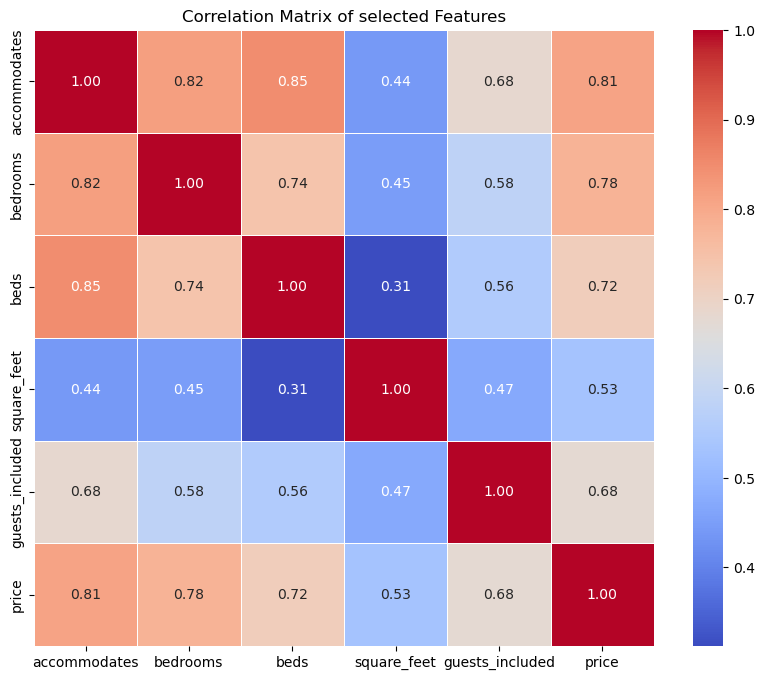

In [12]:
# Calculating correlation matrix
correlation_matrix_listings = listings_df_cleaned.corr()
 
# Visualizing correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_listings, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of selected Features")
plt.show()

In [13]:
# Selecting features most correlated with 'price' with correlation > 0.4
significant_features = correlation_matrix_listings['price'][correlation_matrix_listings['price'] > 0.4]
correlated_features = significant_features.index.tolist()

# Ensuring 'price' is removed from in the correlated features
if 'price' in correlated_features:
    correlated_features.remove('price')

print("Significant Features (Correlation > 0.4):", correlated_features)

Significant Features (Correlation > 0.4): ['accommodates', 'bedrooms', 'beds', 'square_feet', 'guests_included']


We have selected features like `accommodates, bedrooms, beds, square_feet, and guests_included` to be our `final predictors` for our analysis. We finalised these features with `correlations above 0.4` excluding price.

In [14]:
# Printing the summary
print("Selected Features:", X.columns.tolist())
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Selected Features: ['accommodates', 'bedrooms', 'beds', 'guests_included', 'square_feet']
Training data shape: (3054, 5)
Testing data shape: (764, 5)


`NOTE` : accommodates, bedrooms, beds, guests_included, square_feet, and price are the selected features for our analysis

### 3) Visualizing how target variable 'price' is working with other variables

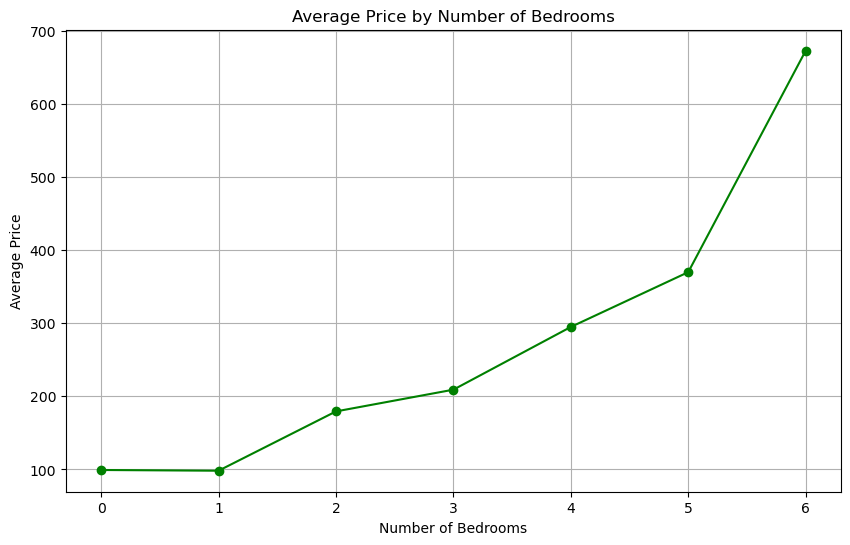

In [15]:
# plot 1: Line chart visualizing Average price vs number of bedrooms

bedrooms_price = listings_df_cleaned.groupby('bedrooms')['price'].mean()
plt.figure(figsize=(10, 6))
bedrooms_price.plot(kind='line', marker='o', color='green')
plt.title('Average Price by Number of Bedrooms')
plt.ylabel('Average Price')
plt.xlabel('Number of Bedrooms')
plt.grid(True)
plt.show()

The above line chart shows how the `average price of listings` are increasing as the `number of bedrooms` in the listings goes up. This analysis shows that the trend increases in the price is `directly propotional` with the addition of more number bedrooms.

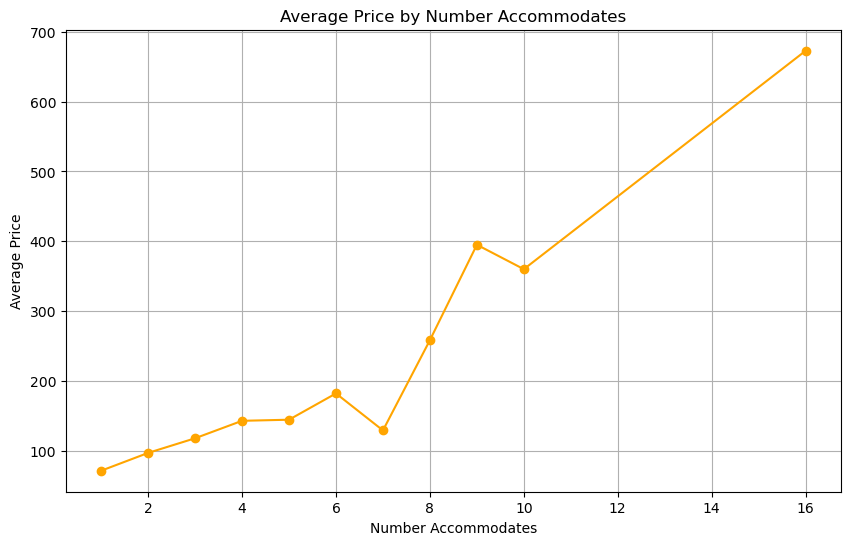

In [16]:
# plot 2: Line chart visualizing Average price vs number of accomodates

accommodates_price =listings_df_cleaned.groupby('accommodates')['price'].mean()
plt.figure(figsize=(10, 6))
accommodates_price.plot(kind='line', marker='o', color='orange')
plt.title('Average Price by Number Accommodates')
plt.ylabel('Average Price')
plt.xlabel('Number Accommodates')
plt.grid(True)
plt.show()

In the above line chart, the variable displayed on the `x-axis` shows the `number of people a property accommodates` while the `y-axis` displays the `average price` of the listing. Similar to the 1st plot, the relationship between the price and the number of accommodates is `directly propotional`. So, as the number of people increases the price of listing also rises.

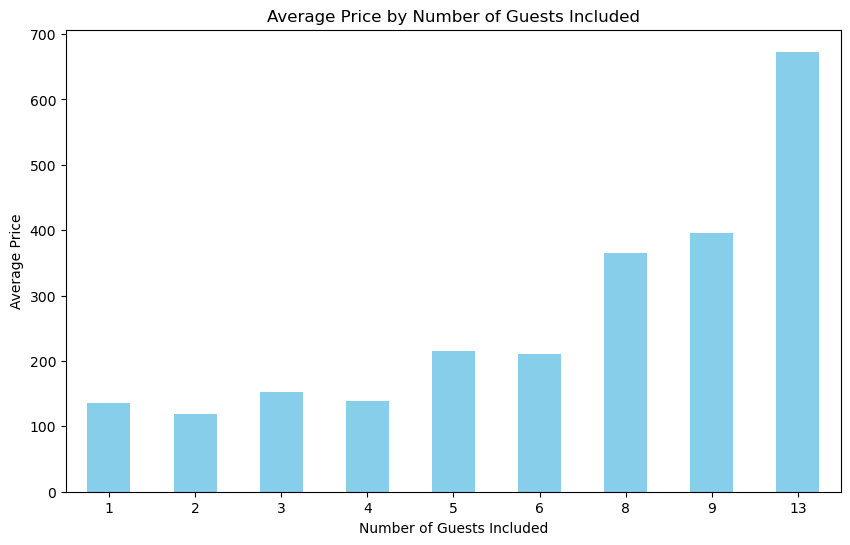

In [17]:
# plot 3: Bar chart visualizing Average price vs number of guests_included

guests_included_price = listings_df_cleaned.groupby('guests_included')['price'].mean()
plt.figure(figsize=(10, 6))
guests_included_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Number of Guests Included')
plt.ylabel('Average Price')
plt.xlabel('Number of Guests Included')
plt.xticks(rotation=0)
plt.show()

The above bar chart showing the `average price` by referring to the `number of guests` beneath the basic price. But, the prices tend to be higher for a more number of guests, which increases even more with higher numbers.

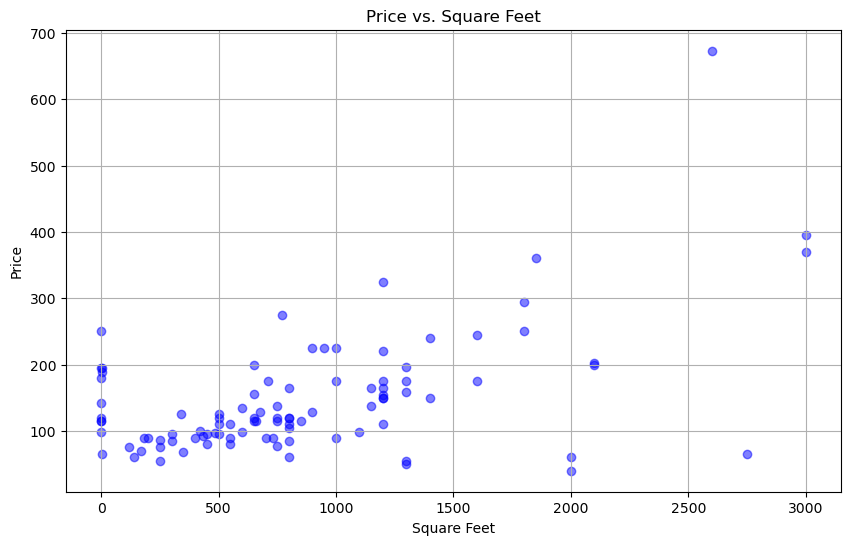

In [18]:
# plot 4: Scatterplot visualizing Average price vs square_feet

square_feet_data = listings_df_cleaned.dropna(subset=['square_feet'])
square_feet_price = square_feet_data.groupby('square_feet')['price'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(square_feet_data['square_feet'], square_feet_data['price'], color='blue', alpha=0.5)
plt.title('Price vs. Square Feet')
plt.ylabel('Price')
plt.xlabel('Square Feet')
plt.grid(True)
plt.show()

A scatter plot is visualized above showing the correlation between the `price of properties` and their `square feet`. Our analysis discovers that there is an upward trend going by the fact that most of the properties with a large area/square feet cost more.

### 4) Visualizations

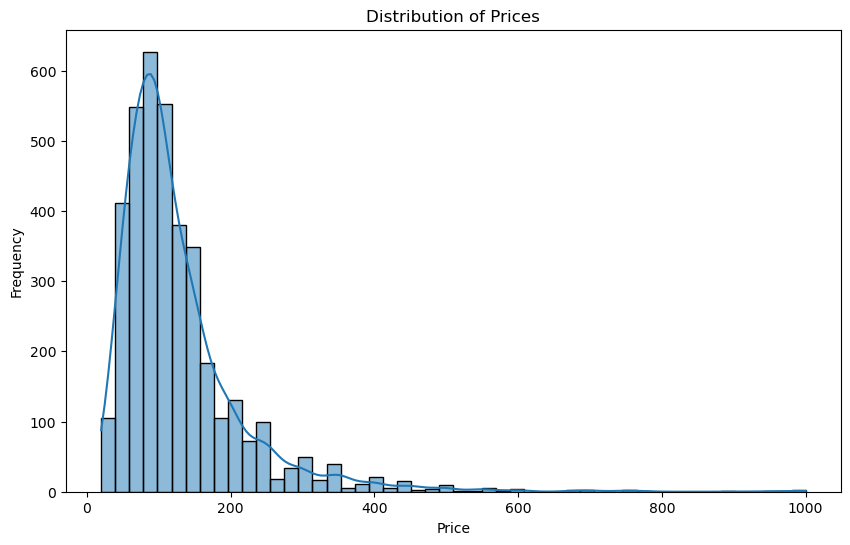

In [19]:
# Plot-1: Histogram distribution of the target variable

plt.figure(figsize=(10, 6))
sns.histplot(listings_df['price'], kde=True, bins=50)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

First, we visualized a `histogram` that displays the `distribution of listing prices`. This gave us an idea of how prices are spread across various listings. We found that, most listings prices were clustered within a specific range, but we also noticed there are some outliers with very high values.

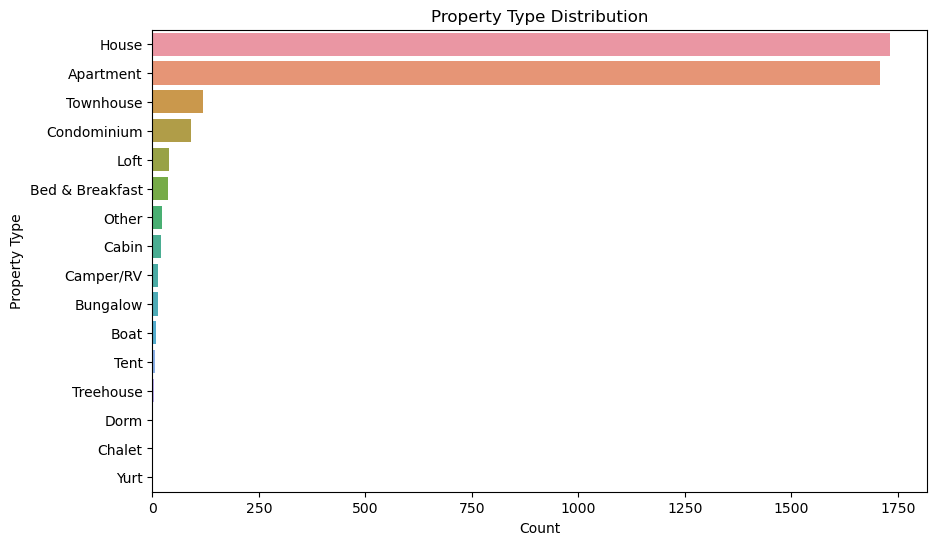

In [20]:
# Plot-2: Bar Plot for distribution property type

plt.figure(figsize=(10, 6))
sns.countplot(y='property_type', data=listings_df, order=listings_df['property_type'].value_counts().index)
plt.title('Property Type Distribution')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

Later, we used a `bar chart` to visualize `distribution of property types` such as houses, apartments and unique options like treehouses or boats etc. The chart revealed that `houses and apartments` are the most commonly used property types by the customers, while options like `treehouses, dorms chalet, and yurt` are very rare.

Average Price by Property Type:
 property_type
Boat               282.375000
Condominium        151.109890
Loft               135.700000
House              132.351414
Townhouse          129.457627
Apartment          122.932670
Camper/RV          120.461538
Bungalow           115.615385
Bed & Breakfast    112.054054
Cabin              104.666667
Treehouse          101.000000
Yurt               100.000000
Chalet              98.500000
Other               94.681818
Tent                54.000000
Dorm                39.500000
Name: price, dtype: float64


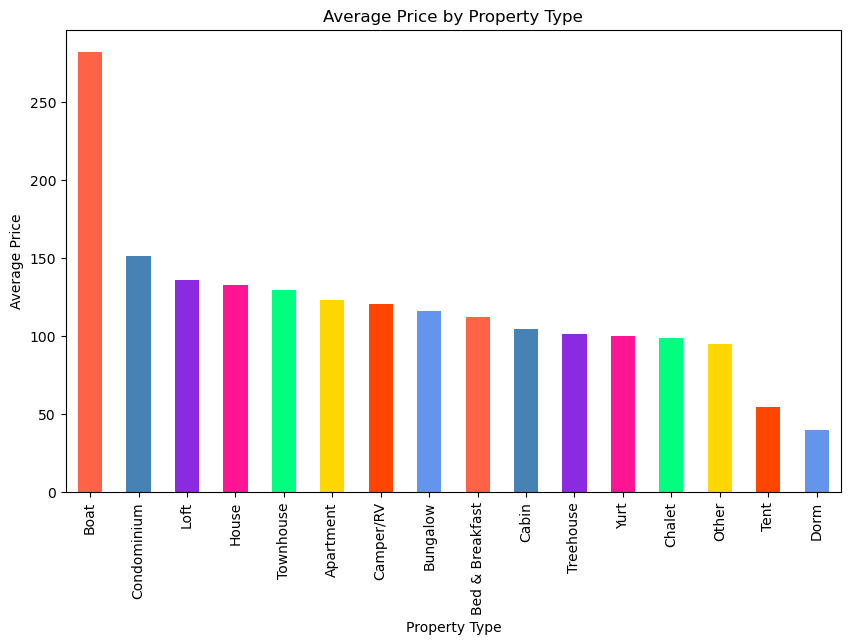

In [21]:
# plot-3: Bar plot for average price by property type

# Dropping rows with missing values in 'price' or 'property_type'
listings_df = listings_df.dropna(subset=['price', 'property_type'])

# Analysis for categorical variables
grouped = listings_df.groupby('property_type')['price'].mean().sort_values(ascending=False)
print("Average Price by Property Type:\n", grouped)

# Defining a list of colors
unique_colors = ['#FF6347', '#4682B4', '#8A2BE2', '#FF1493', '#00FF7F', '#FFD700', '#FF4500', '#6495ED']

plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color=unique_colors[:len(grouped)])
plt.title('Average Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()
warnings.filterwarnings("ignore")

In the above bar chart we analyzed the `average price for each property type`. We found that luxury listings like `boats or treehouses` have `higher prices`, while more basic accommodations such as `dorms and tents` have comparitively `low prices`. Hence, they are more affordable. We could also see that there is a variation in pricing across different property types and showed that the price distribution is slightly skewed, meaning we might need to account for outliers during modeling.

### 5) Data Preparation

In [22]:
# Checking for missing values
print("\nMissing values in the dataset:")
listings_df.isnull().sum()


Missing values in the dataset:


id                                    0
listing_url                           0
scrape_id                             0
last_scraped                          0
name                                  0
                                   ... 
cancellation_policy                   0
require_guest_profile_picture         0
require_guest_phone_verification      0
calculated_host_listings_count        0
reviews_per_month                   626
Length: 92, dtype: int64

We found that, `reviews_per_month` has 626 missing values. So, we dropped them and for numerical fields like square feet, we filled the missing values with the mean as shown below

In [23]:
# Dropping columns if they exist, and ignoring if they don't exist anymore
listings_df = listings_df.drop(columns=['square_feet', 'license'], errors='ignore')

# Imputing missing values with the mean
listings_df['reviews_per_month'].fillna(listings_df['reviews_per_month'].mean(), inplace=True)

# Checking for missing values again
missing_values = listings_df.isnull().sum()
print("Missing Values:\n", missing_values)
warnings.filterwarnings("ignore")

Missing Values:
 id                                  0
listing_url                         0
scrape_id                           0
last_scraped                        0
name                                0
                                   ..
cancellation_policy                 0
require_guest_profile_picture       0
require_guest_phone_verification    0
calculated_host_listings_count      0
reviews_per_month                   0
Length: 90, dtype: int64


In [24]:
# Checking unique values for categorical columns like property_type
print("\nUnique values in 'property_type':")
listings_df['property_type'].unique()


Unique values in 'property_type':


array(['Apartment', 'House', 'Cabin', 'Condominium', 'Camper/RV',
       'Bungalow', 'Townhouse', 'Loft', 'Boat', 'Bed & Breakfast',
       'Other', 'Dorm', 'Treehouse', 'Yurt', 'Chalet', 'Tent'],
      dtype=object)

We converted non-numeric columns such as `property types` into numbers using `one-hot encoding`.

In [25]:
# Selecting required columns for our analysis
selected_features = ['bedrooms', 'property_type', 'accommodates', 'beds', 'bathrooms', 'guests_included']
target = 'price'

# Ensuring we dropped rows with missing values in selected relevant columns
df = listings_df[selected_features + [target]].dropna()

# Handling non-numeric columns using One-hot encoding for 'property_type'
df = pd.get_dummies(df, columns=['property_type'], drop_first=True)

# Ensuring 'price' column is cleaned if it contains symbols like '$'
df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Ensuring there are no invalid values
df = listings_df.replace([np.inf, -np.inf], np.nan).dropna()
warnings.filterwarnings("ignore")

We focused on key features like the number of bedrooms, accommodates, property_type, bathrooms, guests_included, and the number of beds. We found that they have a strong relationship with price.

### 6) Model Construction

We tried to build Machine Learning models with both regression and classification algorithms to work on our Airbnb listing data. 

In [26]:
# Creating price categories for classification
listings_df['price_category'] = pd.qcut(listings_df['price'], q=3, labels=['Low', 'Medium', 'High'])

# Selecting features and target variables
selected_features = ['latitude', 'longitude', 'bedrooms', 'property_type', 'accommodates', 'beds', 'guests_included']
X = listings_df[selected_features]
# Target for regression
y_reg = listings_df['price']  
# Target for classification
y_class = listings_df['price_category']

# Handling non-numeric columns like property_type using one-hot encoding
X = pd.get_dummies(X, columns=['property_type'], drop_first=True)

# Handling missing values and ensuring consistency
X = X.replace([np.inf, -np.inf], np.nan).dropna()
y_reg = y_reg.loc[X.index]
y_class = y_class.loc[X.index]

# Splitting data for regression
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# Splitting data for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.3, random_state=42)
warnings.filterwarnings("ignore")

After creating the price category for classification, we divided the dataset into 2 sepearate training and testing sets for regression and classification respectively. For `regression`, we used the the `numerical price` as our target variable with a `70:30 split`. Whereas, For `classification` we used the `price_category` as our target with a `80:20 split`. This allowed both tasks to have a proper amount of data for training and testing.

### Regression Models

In [27]:
# Regression Model-1: Multiple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.3, random_state=42)

# Training the linear regression model
linear_model_listings = LinearRegression()
linear_model_listings.fit(X_train, y_train)

# Making predictions
y_pred_linear_listings = linear_model_listings.predict(X_test)

# Evaluating the model
mse_multi_linear_listings = mean_squared_error(y_test, y_pred_linear_listings)
r2_multi_linear_listings = r2_score(y_test, y_pred_linear_listings)

print(f"Multiple Linear Regression - MSE: {mse_multi_linear_listings}, R2: {r2_multi_linear_listings}")

Multiple Linear Regression - MSE: 4037.8813345733206, R2: 0.5131874210775194


In [28]:
# Regression Model-2: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

# Training the model
rf_model_listings = RandomForestRegressor(random_state=42)
rf_model_listings.fit(X_train, y_train)

# Making predictions
y_pred_rf_listings = rf_model_listings.predict(X_test)

# Evaluating the model
mse_rf_listings = mean_squared_error(y_test, y_pred_rf_listings)
r2_rf_listings = r2_score(y_test, y_pred_rf_listings)
print(f"Random Forest - MSE: {mse_rf_listings}, R2: {r2_rf_listings}")

Random Forest - MSE: 3603.4252949256343, R2: 0.5655660443120445


In [30]:
# Tuned Random Forest Regression Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Defining the parameter grid
param_grid_tuned_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Performing GridSearchCV to find the best hyperparameters
grid_search_tuned_rf = GridSearchCV(estimator=rf_model_listings, param_grid=param_grid_tuned_rf, cv=5, scoring='r2', n_jobs=-1, verbose=2)
grid_search_tuned_rf.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search_tuned_rf.best_params_
print(f"Best Parameters: {best_params}")

# Training the Random Forest model with the best parameters
tuned_rf_model = grid_search_tuned_rf.best_estimator_

# Making predictions
y_pred_tuned_rf = tuned_rf_model.predict(X_test)

# Evaluating the tuned model
mse_tuned_rf = mean_squared_error(y_test, y_pred_tuned_rf)
r2_tuned_rf = r2_score(y_test, y_pred_tuned_rf)
print(f"Tuned Random Forest - MSE: {mse_tuned_rf}, R2: {r2_tuned_rf}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
Tuned Random Forest - MSE: 3375.4694841695887, R2: 0.5930487132959863


In [31]:
# Regression Model-3: Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

# Training the model
dt_model_listings = DecisionTreeRegressor(random_state=42)
dt_model_listings.fit(X_train, y_train)

# Making predictions
y_pred_dt_listings = dt_model_listings.predict(X_test)

# Evaluating the model
mse_dt_listings = mean_squared_error(y_test, y_pred_dt_listings)
r2_dt_listings = r2_score(y_test, y_pred_dt_listings)
print(f"Decision Tree - MSE: {mse_dt_listings}, R2: {r2_dt_listings}")

Decision Tree - MSE: 7058.347331583552, R2: 0.1490358475871636


In [32]:
# Tuned Decision Tree Regression Model

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Defining the parameter grid
param_grid_tuned_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Setting up GridSearchCV
grid_search_tuned_dt = GridSearchCV(estimator=dt_model_listings, param_grid=param_grid_tuned_dt, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Fitting the model
grid_search_tuned_dt.fit(X_train, y_train)

# Extracting the best model
best_dt_tuned_dt = grid_search_tuned_dt.best_estimator_

# Making predictions with the tuned model
y_pred_dt_tuned_listings = best_dt_tuned_dt.predict(X_test)

# Evaluating the tuned model
mse_dt_tuned_listings = mean_squared_error(y_test, y_pred_dt_tuned_listings)
r2_dt_tuned_listings = r2_score(y_test, y_pred_dt_tuned_listings)

print(f"Tuned Decision Tree - MSE: {mse_dt_tuned_listings}, R2: {r2_dt_tuned_listings}")

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Tuned Decision Tree - MSE: 4204.53328110832, R2: 0.49309563106365384


In [35]:
# Regression Model-4: KNN Regressor

from sklearn.neighbors import KNeighborsRegressor

# Training the model
knn_model_listings = KNeighborsRegressor(n_neighbors=5)
knn_model_listings.fit(X_train, y_train)

# Making predictions
y_pred_knn_listings = knn_model_listings.predict(X_test)

# Evaluating the model
mse_knn_listings = mean_squared_error(y_test, y_pred_knn_listings)
r2_knn_listings = r2_score(y_test, y_pred_knn_listings)
print(f"KNN - MSE: {mse_knn_listings}, R2: {r2_knn_listings}")

KNN - MSE: 4221.471426071741, R2: 0.4910535447940044


In [36]:
# Tuned KNN Regressor

from sklearn.metrics import mean_squared_error, r2_score

# Defining = range of k values to test
k_values = range(1, 21)
mse_values = []
r2_values = []

# Evaluating performance by looping k values
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse_values.append(mean_squared_error(y_test, y_pred))
    r2_values.append(r2_score(y_test, y_pred))

# Identifying the best k value
best_k = k_values[mse_values.index(min(mse_values))]

# Printing the best k value and corresponding performance metrics
print(f"Best k: {best_k}")
print(f"Best MSE: {min(mse_values)}")
print(f"R2 Score at Best k: {r2_values[mse_values.index(min(mse_values))]}")

Best k: 15
Best MSE: 3981.2484728297854
R2 Score at Best k: 0.5200151575048069


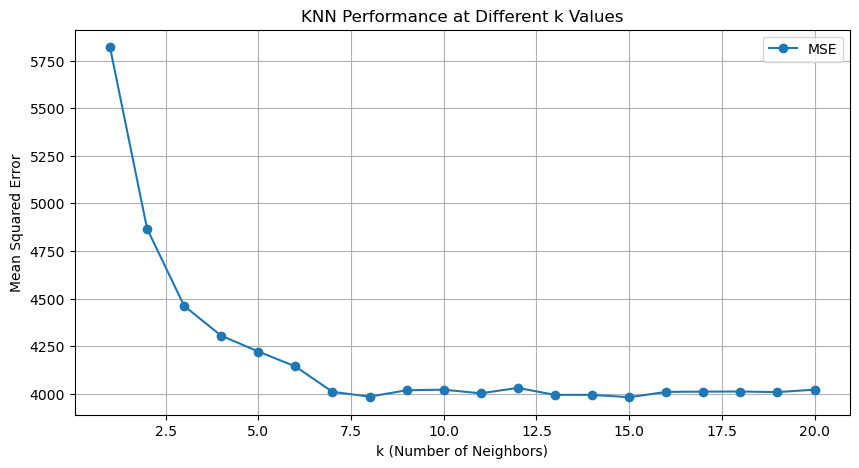

In [37]:
# Plotting MSE vs k

plt.figure(figsize=(10, 5))
plt.plot(k_values, mse_values, marker='o', label='MSE')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.title('KNN Performance at Different k Values')
plt.legend()
plt.grid()
plt.show()

This above graph uses `MSE` as the metric for evaluating the results of the `KNN` algorithm at different k levels. The MSE remains almost fixed at `k=10`, which is an ideal figure, then starts to decrease gradually as k increases. Due to overfitting the model presents higher MSE for smaller values of k while k values as very large can lead to cases of underfitting. It is recommended to take K=10 or something like that for getting best results.

### Classification Models

In [38]:
# Classification Model-1: Naive Bayes 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Training the Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_class, y_train_class)

# Making predictions and evaluating the model
y_pred_nb = nb_model.predict(X_test_class)
print(f"Naive Bayes - Accuracy: {nb_model.score(X_test_class, y_test_class)}")

Naive Bayes - Accuracy: 0.3989501312335958


In [39]:
# Classification Model-2: Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

# Training the model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_class, y_train_class)

# Evaluating the model
accuracy_logistic = logistic_model.score(X_test_class, y_test_class)
print(f"Logistic Regression Classifier - Accuracy: {accuracy_logistic}")
warnings.filterwarnings("ignore")

Logistic Regression Classifier - Accuracy: 0.6019247594050744


### 7) Assumption and Validation

In [40]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Multiple Linear Regression
cv_scores_linear_mse = cross_val_score(linear_model_listings, X, y_reg, scoring='neg_mean_squared_error', cv=5)
cv_scores_linear_r2 = cross_val_score(linear_model_listings, X, y_reg, scoring='r2', cv=5)

print(f"Multiple Linear Regression - CV: MSE: {np.mean(-cv_scores_linear_mse):.4f}, CV R²: {np.mean(cv_scores_linear_r2):.4f}")

# Cross-validation for Random Forest
cv_scores_rf_mse = cross_val_score(rf_model_listings, X, y_reg, scoring='neg_mean_squared_error', cv=5)
cv_scores_rf_r2 = cross_val_score(rf_model_listings, X, y_reg, scoring='r2', cv=5)

print(f"Random Forest Regression - CV: MSE: {np.mean(-cv_scores_rf_mse):.4f}, CV R²: {np.mean(cv_scores_rf_r2):.4f}")

# Cross-validation for Decision Tree
cv_scores_dt_mse = cross_val_score(dt_model_listings, X, y_reg, scoring='neg_mean_squared_error', cv=5)
cv_scores_dt_r2 = cross_val_score(dt_model_listings, X, y_reg, scoring='r2', cv=5)

print(f"Decision Tree Regression - CV: MSE: {np.mean(-cv_scores_dt_mse):.4f}, CV R²: {np.mean(cv_scores_dt_r2):.4f}")

# Cross-validation for KNN Regressor
cv_scores_knn_mse = cross_val_score(knn_model_listings, X, y_reg, scoring='neg_mean_squared_error', cv=5)
cv_scores_knn_r2 = cross_val_score(knn_model_listings, X, y_reg, scoring='r2', cv=5)

print(f"KNN Regressor - CV MSE: {np.mean(-cv_scores_knn_mse):.4f}, CV R²: {np.mean(cv_scores_knn_r2):.4f}")

Multiple Linear Regression - CV: MSE: 4430.7537, CV R²: 0.4351
Random Forest Regression - CV: MSE: 4074.4921, CV R²: 0.4785
Decision Tree Regression - CV: MSE: 6409.9766, CV R²: 0.1788
KNN Regressor - CV MSE: 4595.7190, CV R²: 0.4073


In [41]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# Cross-validation predictions for Naive Bayes
y_pred_nb_cv = cross_val_predict(nb_model, X, y_class, cv=5)
print("Naive Bayes - Classification Report:")
print(classification_report(y_class, y_pred_nb_cv))

# Cross-validation for Logistic Regression classifier
y_pred_logistic_cv = cross_val_predict(logistic_model, X, y_class, cv=5)
print("Logistic Regression Classifier - Classification Report:")
print(classification_report(y_class, y_pred_logistic_cv))
warnings.filterwarnings("ignore")

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

        High       0.75      0.38      0.51      1243
         Low       0.53      0.02      0.04      1337
      Medium       0.35      0.90      0.51      1230

    accuracy                           0.42      3810
   macro avg       0.55      0.43      0.35      3810
weighted avg       0.55      0.42      0.34      3810

Logistic Regression Classifier - Classification Report:
              precision    recall  f1-score   support

        High       0.73      0.63      0.68      1243
         Low       0.62      0.78      0.69      1337
      Medium       0.48      0.40      0.43      1230

    accuracy                           0.61      3810
   macro avg       0.61      0.60      0.60      3810
weighted avg       0.61      0.61      0.60      3810



Logistic Regression Classifier is the better model because it does well across all metrics and classes. Naive Bayes, on the other hand, has issues, especially with accuracy and recall for some labels. For this data, Logistic Regression Classifier is the best method to use.

### 8) Making the prediction on new testing data

In [42]:
# Simulating new testing data
new_test_data = pd.DataFrame({
    'bedrooms': [2, 3],
    'property_type': ['Apartment', 'House'],
    'accommodates': [4, 6],
    'beds': [2, 3],
    'bathrooms': [1.5, 2],
    'guests_included': [2, 3] })

# Preprocessing new testing data
new_test_data = pd.get_dummies(new_test_data, columns=['property_type'], drop_first=True)

# Ensuring feature alignment with training data
missing_cols = set(X.columns) - set(new_test_data.columns)
for col in missing_cols:
    new_test_data[col] = 0
new_test_data = new_test_data[X.columns]

In [43]:
# Multiple Linear Regression Prediction
y_pred_linear_new = linear_model_listings.predict(new_test_data)
print(f"Multiple Linear Regression Predictions: {y_pred_linear_new}")

# Random Forest Prediction
y_pred_rf_new = rf_model_listings.predict(new_test_data)
print(f"Random Forest Predictions: {y_pred_rf_new}")

# Decision Tree Prediction
y_pred_dt_new = dt_model_listings.predict(new_test_data)
print(f"Decision Tree Predictions: {y_pred_dt_new}")

# KNN Prediction
y_pred_knn_new = knn_model_listings.predict(new_test_data)
print(f"KNN Predictions: {y_pred_knn_new}")

Multiple Linear Regression Predictions: [-18399.75899614 -18346.63382331]
Random Forest Predictions: [106.49 143.49]
Decision Tree Predictions: [59. 65.]
KNN Predictions: [ 82.  169.2]


In [44]:
# Naive Bayes Prediction
y_pred_nb_new = nb_model.predict(new_test_data)
print(f"Naive Bayes Predictions: {y_pred_nb_new}")

# Logistic Regression Classifier Prediction
y_pred_logistic_new = logistic_model.predict(new_test_data)
print(f"Logistic Regression Classifier Predictions: {y_pred_logistic_new}")

Naive Bayes Predictions: ['Low' 'Low']
Logistic Regression Classifier Predictions: ['High' 'High']


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Training the Random Forest model
rf_model_listings = RandomForestRegressor(random_state=42)
rf_model_listings.fit(X_train, y_train)

# Making predictions using the Random Forest model
predicted_prices_rf = rf_model_listings.predict(X_test)

# Creating a DataFrame to compare predictions with actual prices
predictions_listings_df = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": predicted_prices_rf })

# Displaying the first 5 rows of predictions
print("Comparison of Actual and Predicted Prices:")
print(predictions_listings_df.head())

# Saving the comparison to a CSV file for further analysis
output_file = "model_predictions_comparison_rf.csv"
predictions_listings_df.to_csv(output_file, index=False)

# Evaluating the model
mse_rf_listings = mean_squared_error(y_test, predicted_prices_rf)
r2_rf_listings = r2_score(y_test, predicted_prices_rf)
print(f"Random Forest - MSE: {mse_rf_listings}, R2: {r2_rf_listings}")

Comparison of Actual and Predicted Prices:
   Actual Price  Predicted Price
0          90.0            75.89
1          80.0           106.96
2         195.0            94.04
3          82.0            84.86
4          85.0            74.59
Random Forest - MSE: 3603.4252949256343, R2: 0.5655660443120445


The Random Forest model's predictions are pretty close to the actual prices, as shown by comparisons in the DataFrame and Evaluation measures (MSE and R^2).

### Step 8: Conclusion

Our Analysis reveals that the `Tuned Random Forest Regressor` model is the most effective in predicting listing prices, with the `lowest MSE (3375.469) and greatest R² (0.59304)`, explaining `59%` of the variation in the data. This is the most accurate price prediction model. While `Multiple Linear Regression` had a `decent MSE` of  `4430.7537`, and a `R²` of `0.4351`, it did not have the lowest error rate. The `Decision Tree model` has difficulties with overfitting, resulting in the `highest MSE ( 6409.9766) and lowest R² (0.1788)`. Comparitively `Logistic regression classifier (0.68)` is having better accuracy than `Naive Bayes classifier (0.42).`

Feature engineering can be explored by creating interaction terms, applying transformations to capture non-linear relationships, and adding more relevant features like location and seasonal demand trends can improve model performance. Additionally, by changing hyperparameters through Grid Search and Randomized Search can also improve models like Random Forest and Decision Tree. Using k-fold cross-validation will evaluate model predictability. Accommodations, bedrooms, and review scores rating strongly affect listing pricing and should be prioritized for model refining.

### Summary:

### Best Model: 
`Tuned Random Forest Regressor`

### Accuracy of Predictions: 
Good alignment between predicted and actual prices.

### Future Focus: 
Enhance feature set, tune hyperparameters, and explore advanced models to improve predictive performance further.

### Reference:

OpemAI - https://chatgpt.com/ For Feature selection 